## **Assignment #2: Classification, Regression, Clustering, Evaluation**

<br>

### **Overview**

In this assignment, you'll level up your data science toolkit. While the first assignment focused on the data, on this one you will practice:

- Classification models

- Regression models

- Feature Engineering

- Evaluations

You’ll go from raw data to insights by building a full modeling pipeline, enhancing your dataset, and training different models.

This assignment will be completed individually.

### **Objectives**

You’ll gain hands-on experience in:
- Evaluation
- Classification
- Regression
- Dataset preparation
- Explore various data hubs
- Engineering meaningful features
- Communicating findings clearly - visually and verbally

<br><br>

### **Submission Guidelines**

1. Please note that this assignmnet must be submitted alone.
2. Link to your HugingFace Model.

Your HF model should include:
- README file: explanations, visuals, insights, etc.
- **Video**: Include the video of your presentation in the README file.
- **Python Notebook**: upload a copy of this notebook, with all of your coding work. Do not submit a Colab link; include the `.ipynb` file in the HF model.
- **ML Models:** Upload your models.

Note: Students may be randomly chosen to present their work in a quick online session with the T.A., typically lasting ±10 minutes. Similar to Peer Review.

<br><br>



### **Evaluation Criteria**

* **Data Handling & EDA (20%)**
  Thoughtful and thorough data cleaning; handling of missing values, outliers, duplicates, and more; well-chosen visualizations; clear statistical summaries; use of EDA to guide modeling choices.

* **Feature Engineering (20%)**
  Creative and effective feature creation, transformation, encoding, selection, scaling, and more; integration of clustering results as features; clear explanation of feature choices and their impact.

* **Model Training (20%)**
  Appropriate selection of models; correct train/test split; reproducible code; logical modeling workflow with a solid baseline and improvements post-feature engineering. An iterative process.

* **Evaluation & Interpretation (20%)**
  Use of relevant evaluation metrics; structured model comparison; use of feature importance or visualizations to interpret results; clear discussion of what the model learned and how it performed.

* **Presentation (20%)**
  4–6 minute video with clear delivery; structured narrative; visuals that support the explanation; confident, professional communication of findings and lessons.

* **Bonus (up to +10%)**
  Extra work such as trying data science tools, creative visualizations, advanced hyper param tuning, interactive dashboards, and deeper business/ethical insights.

* **Late Submission (-10% per day)**
  Assignments submitted after the deadline will receive a 10% penalty per day.

<br><br>

### **Additional Guidelines**

- The first thing you should do is download a copy of this notebook to your drive.
- Keep your dataset size manageable. If the dataset is too large, you can sample a subset.
- Run on Colab (CPU is fine). Colab free is enough. No GPU needed.
- You may use any Python package (scikit-learn, xgboost, lightgbm, catboost, etc.).
- No SHAP required. Use `feature_importances`, and similar tools.
- Make sure your results are reproducible (set **seeds** where needed).
- Be thoughtful with your cluster features — only use them if they help!
- Your presentation should tell a story; what worked, what didn’t, and why.
- Be creative, but also rigorous.

### Assignment High-level Flow

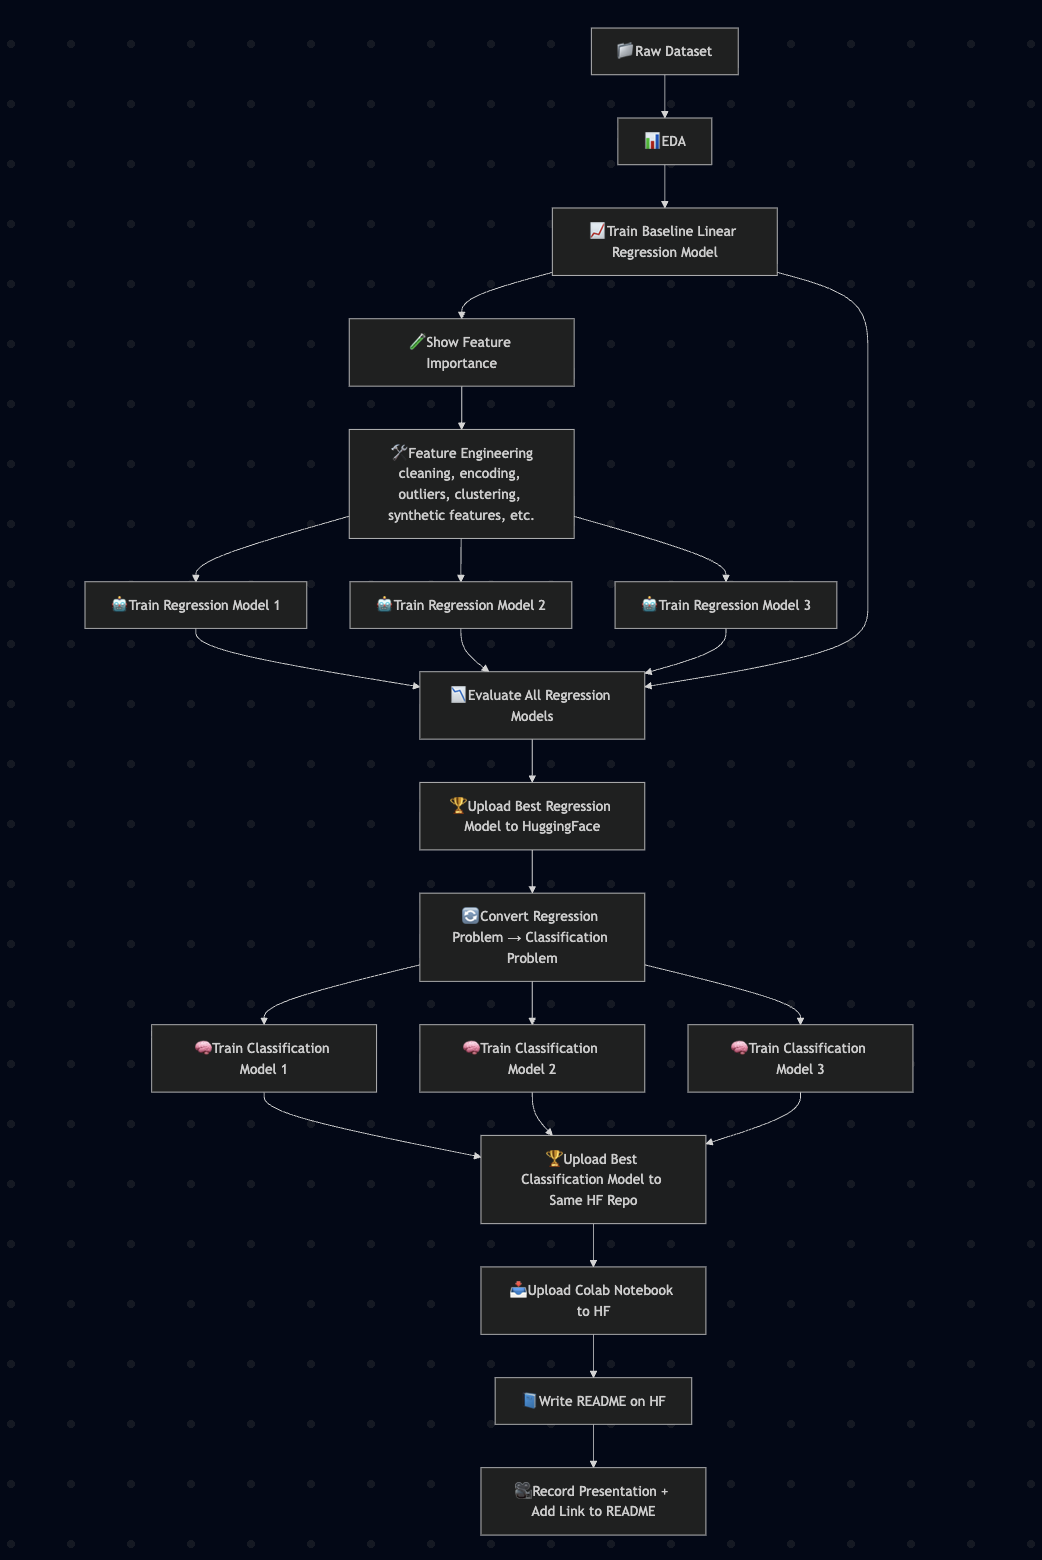

<br><br><br>

---

---

<br><br><br>

imports

In [1]:
import os
import random

import numpy as np
import pandas as pd

import seaborn
import matplotlib.pyplot as plt

# <add more>

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set Seeds

In [2]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# <add more>

For Jupyter Notebooks

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("/content/athletes.csv")

<br><br>

---

<br><br>

# **Part 1: Select a Regression Dataset**

1. Choose a numeric & categorical tabular dataset. If you prefer, you may use  open-source datasets; [Hugginface](https://huggingface.co/datasets?task_categories=task_categories:tabular-classification&sort=trending), [Kaggle](https://www.kaggle.com/datasets?tags=13302-Classification&minUsabilityRating=8.00+or+higher), etc.

2. Avoid choosing a "basic"/"small" dataset.
      - 10K rows and more.
      - 15 features and more.
      - Numeric & Categorial features are a must.

3. The Label (target variable) is numeric.

4. Please submit your dataset [here](https://forms.gle/YYiRLXJnbwUfwuwc7), to share it with the class so everyone can see.
And make sure your chosen dataset is unique using this [link](https://docs.google.com/spreadsheets/d/1M8uojrzhSyVnOlSAJpzCKxrhWdzPR77k4x8Kxvr8VDk/edit?usp=sharing).

      *Note: Due to their popularity, the following are datasets you may not choose.*
      > - Iris dataset
      > - Wine dataset
      > - Titanic dataset
      > - Boston Housing dataset

5. Choose a dataset with a combination of numeric and textual values. This way you would have enough information to work on.

6. Briefly describe your chosen dataset (source, size, features) and the question you want to answer.

<br><br><br>

---

<br><br><br>

# **Part 2: Exploratory Data Analysis (EDA)**

Use your EDA to tell the story of your data - highlight interesting patterns, anomalies, or relationships that lead you toward your classification goal. Ask interesting questions, and answer them.


1. **Data Cleaning** : Check for missing values, duplicate entries, scaling/normalize issues,  parsing dates, fixing typos, or any inconsistencies.  Document how you address them.
2. **Outlier Detection & Handling**: Identify outliers and decide whether to keep or remove them, providing a short justification.
2. **Descriptive Statistics**: Summarize the data (e.g., mean, median, correlations) to reveal patterns.
4. **Visualizations**: Use a set of  plots (e.g., histograms, scatter plots, box plots) to illustrate **key insights.** Label charts, axes, and legends clearly.

Tip: not necessarily in this order.

In [ ]:
# and more...

In [82]:
# Basic cleaning
df = df.drop_duplicates()

# Missing values encoded as placeholder
df = df.replace(8388607, np.nan)

# Filter unrealistic values
df = df[(df['height'] >= 50) & (df['height'] <= 90)]
df = df[(df['weight'] >= 90) & (df['weight'] <= 400)]
df = df[(df['deadlift'] >= 100) & (df['deadlift'] <= 800)]

# Keep relevant variables and drop missing
df_clean = df[['deadlift','height','weight','age','gender','backsq','snatch']].dropna().reset_index(drop=True)

df_clean.head(), df_clean.shape



(   deadlift  height  weight   age gender  backsq  snatch
 0     435.0    73.0   230.0  37.0   Male   414.0   200.0
 1     365.0    68.0   177.0  40.0   Male   365.0   185.0
 2     465.0    65.0   150.0  31.0   Male   405.0   225.0
 3     419.0    72.0   165.0  23.0   Male     0.0   187.0
 4     335.0    70.0   155.0  30.0   Male   235.0    95.0,
 (73558, 7))

### **Research:** Pose relevant questions about your dataset, then answer them using visual elements (e.g. charts or plots) to provide clear insights.

For example, in the 2nd lecture the entire class took a survey. Then, we talked about the collected data and desplayed the collected data using the right **plots** - Lines, Bars, Hist, Pie, Map, HeatMap, Area, Time, etc.

An aditional more specific example, would be the questions we asked during the recitation on the `Titanic` dataset:
  - "Did survival rates differ by gender?"
  - "Was passenger class related to survival?"
  - "What was the age distribution of survivors vs. non-survivors?"
  - "Did embarking location (port) have any effect on survival?"    
  
And how we answered those questions using **plots**.

The idea is to pose questions that can uncover patterns, correlations, or anomalies in your dataset, then back those up with clean, insightful visualizations.

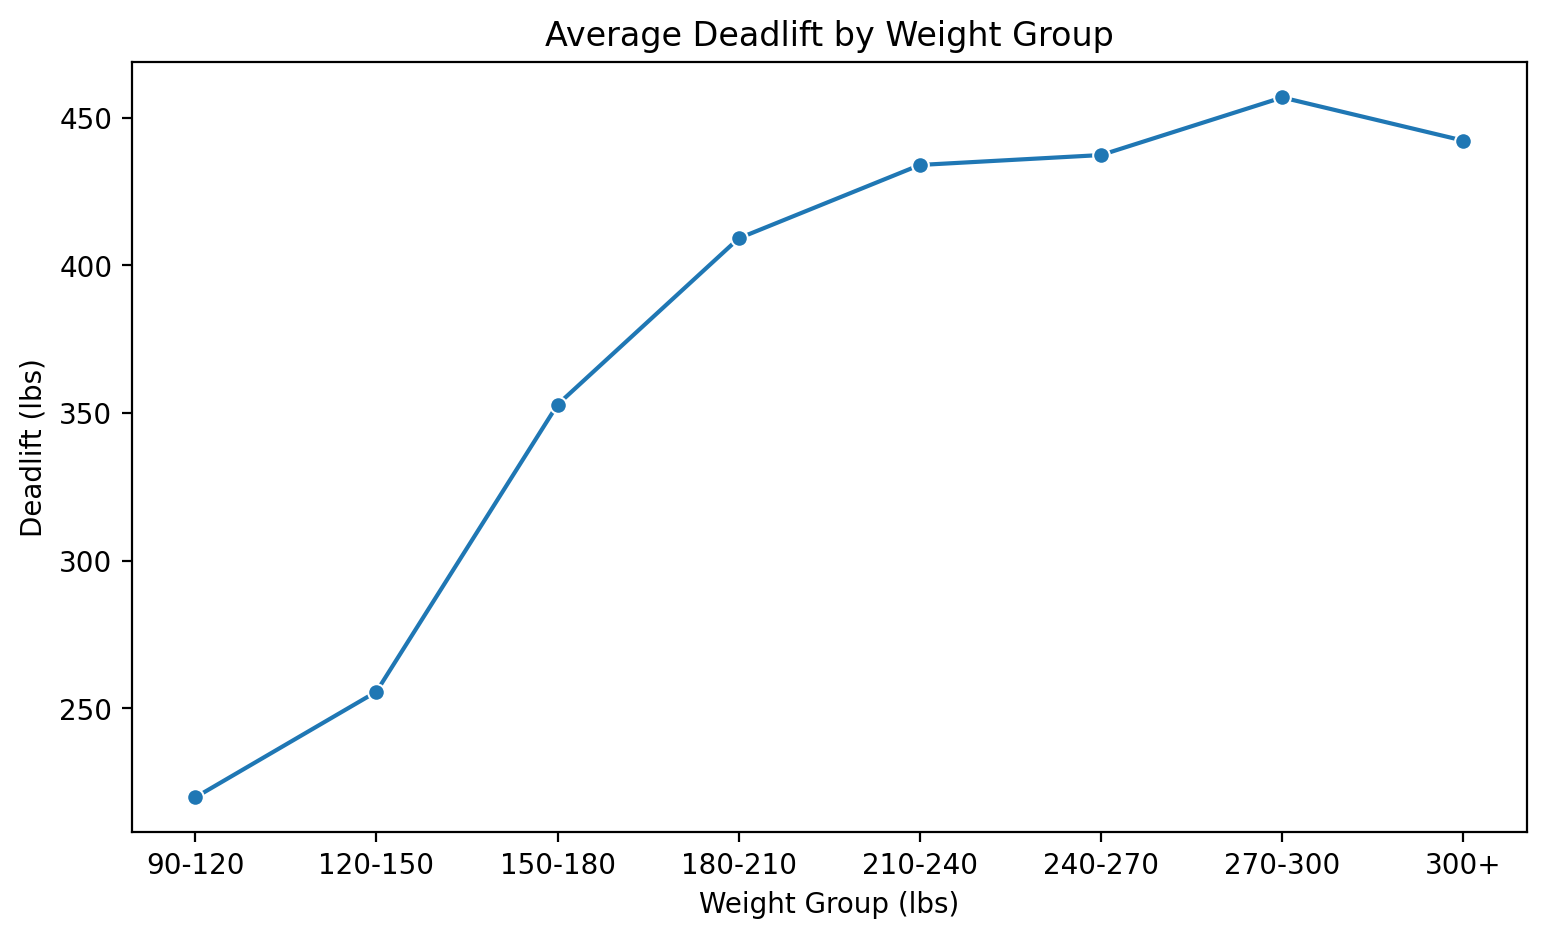

In [83]:
#Q1 Deadlift by weight groups
df_bw = df_clean.copy()
df_bw['weight_bin'] = pd.cut(
    df_bw['weight'],
    bins=[90,120,150,180,210,240,270,300,400],
    labels=['90-120','120-150','150-180','180-210','210-240','240-270','270-300','300+']
)

deadlift_by_weight = (
    df_bw.groupby('weight_bin')['deadlift']
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,5))
sns.lineplot(data=deadlift_by_weight, x='weight_bin', y='deadlift', marker='o')
plt.title("Average Deadlift by Weight Group")
plt.xlabel("Weight Group (lbs)")
plt.ylabel("Deadlift (lbs)")
plt.show()


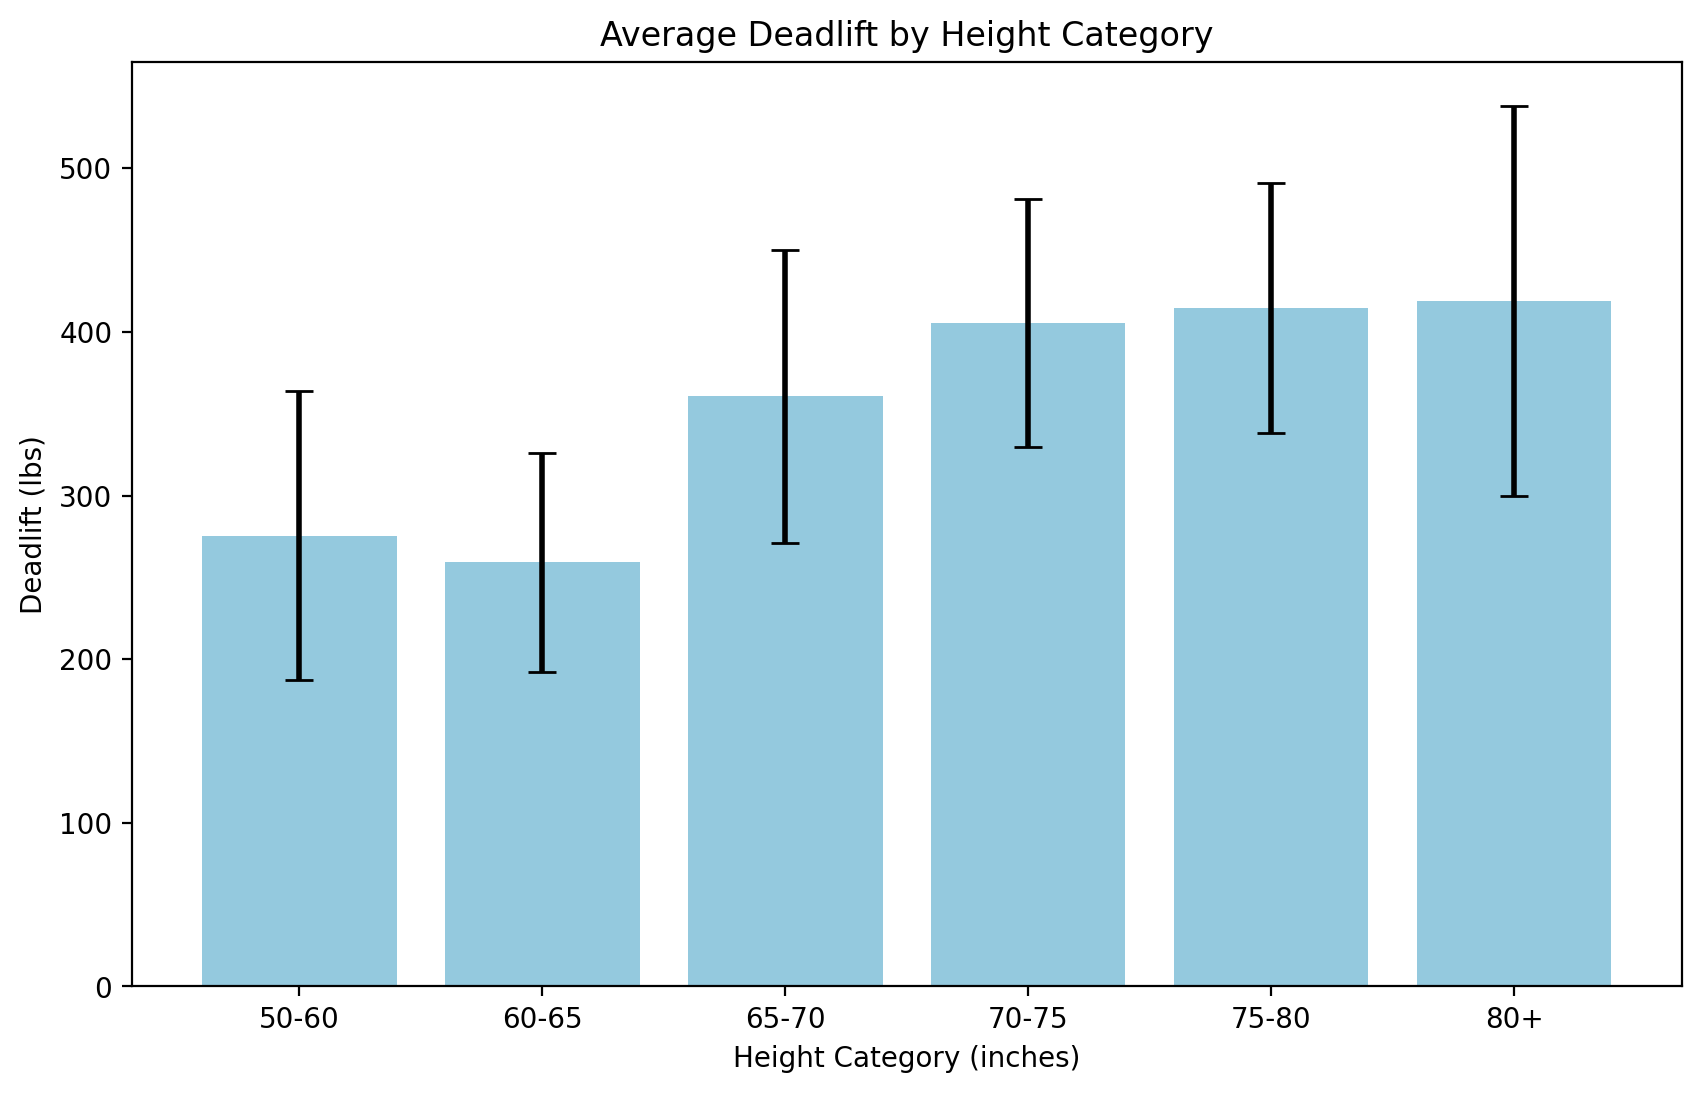

In [85]:
#Q2 Deadlift vs Height (bar plot + error bars)
df_h = df_clean.copy()
df_h['height_bin'] = pd.cut(
    df_h['height'],
    bins=[50,60,65,70,75,80,90],
    labels=['50-60','60-65','65-70','70-75','75-80','80+']
)

h_stats = df_h.groupby('height_bin')['deadlift'].agg(['mean','std']).reset_index()

plt.figure(figsize=(10,6))
bars = sns.barplot(
    data=h_stats,
    x='height_bin',
    y='mean',
    color="skyblue"
)

# Add error bars manually
plt.errorbar(
    x=range(len(h_stats)),
    y=h_stats['mean'],
    yerr=h_stats['std'],
    fmt='none',
    ecolor='black',
    capsize=5,
    linewidth=2
)

plt.title("Average Deadlift by Height Category")
plt.xlabel("Height Category (inches)")
plt.ylabel("Deadlift (lbs)")
plt.show()


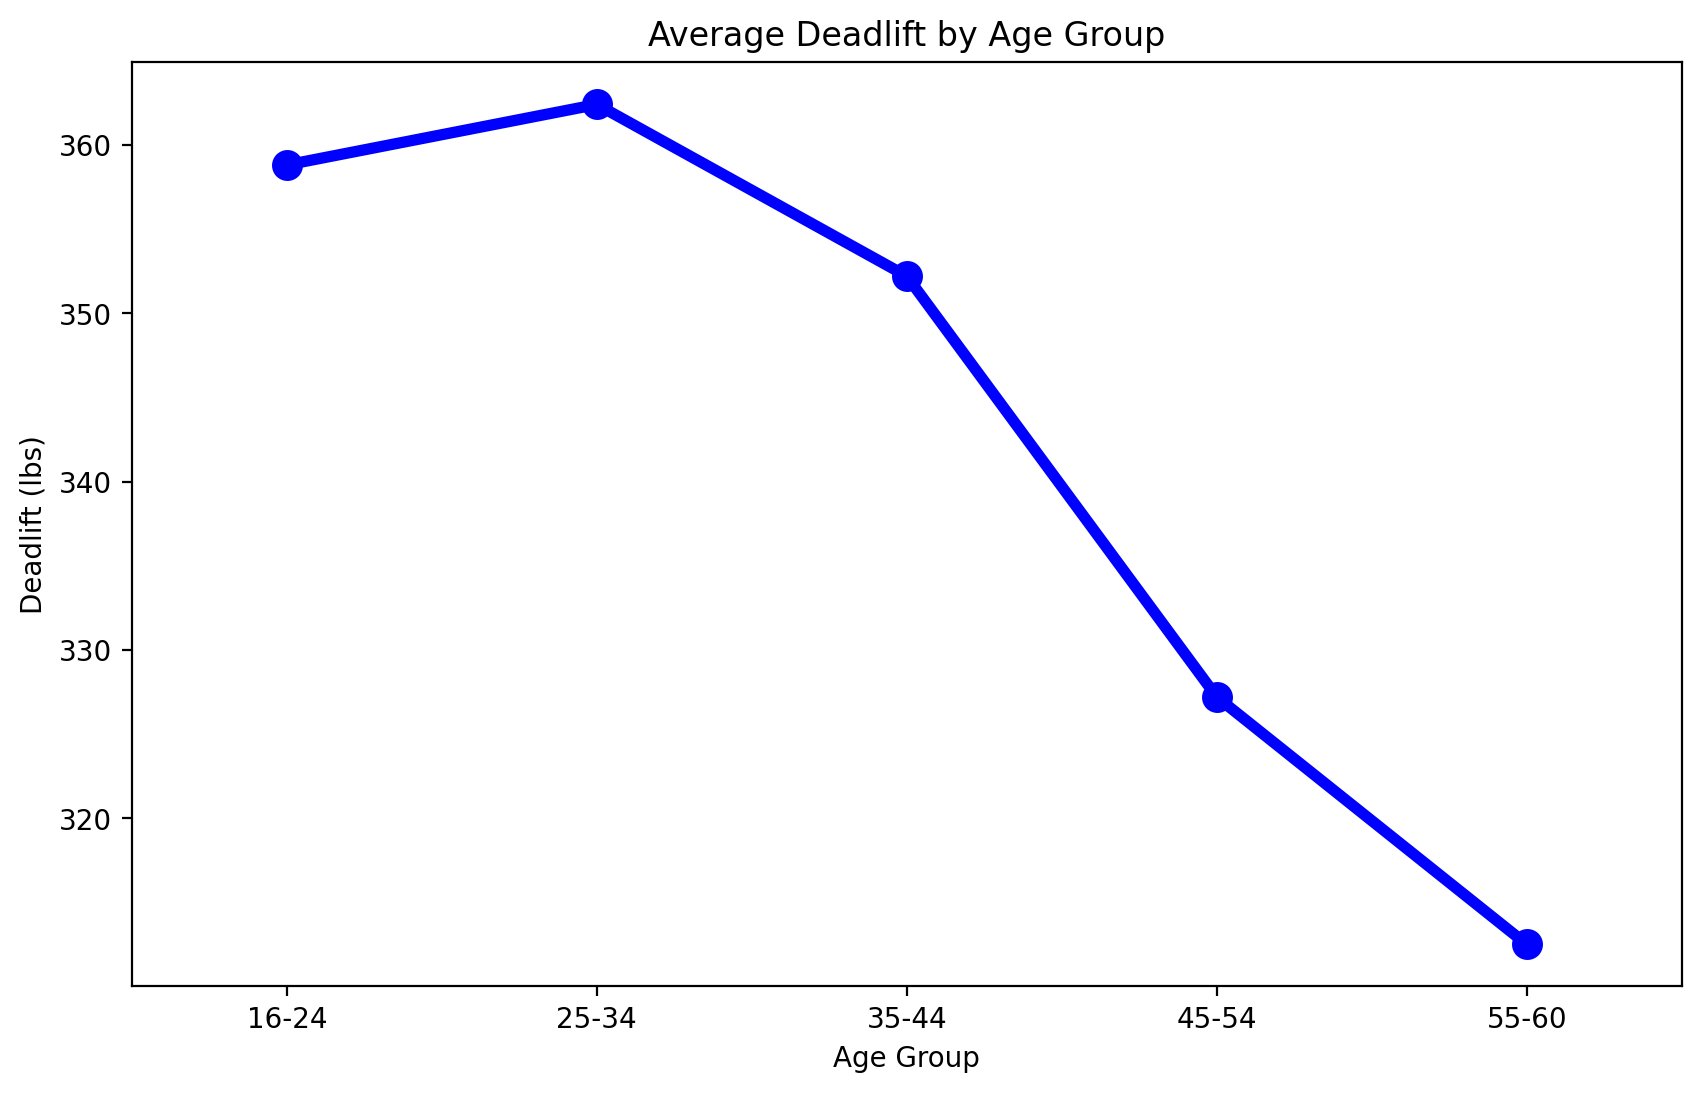

In [47]:
#Q3 Filter unrealistic ages
df_age = df_clean[(df_clean['age'] >= 16) & (df_clean['age'] <= 60)].copy()

plt.figure(figsize=(10,6))
sns.pointplot(
    data=age_stats,
    x='age_group',
    y='deadlift',
    color='blue',
    markers='o',
    linestyles='-',
    scale=1.5
)
plt.title("Average Deadlift by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Deadlift (lbs)")
plt.show()

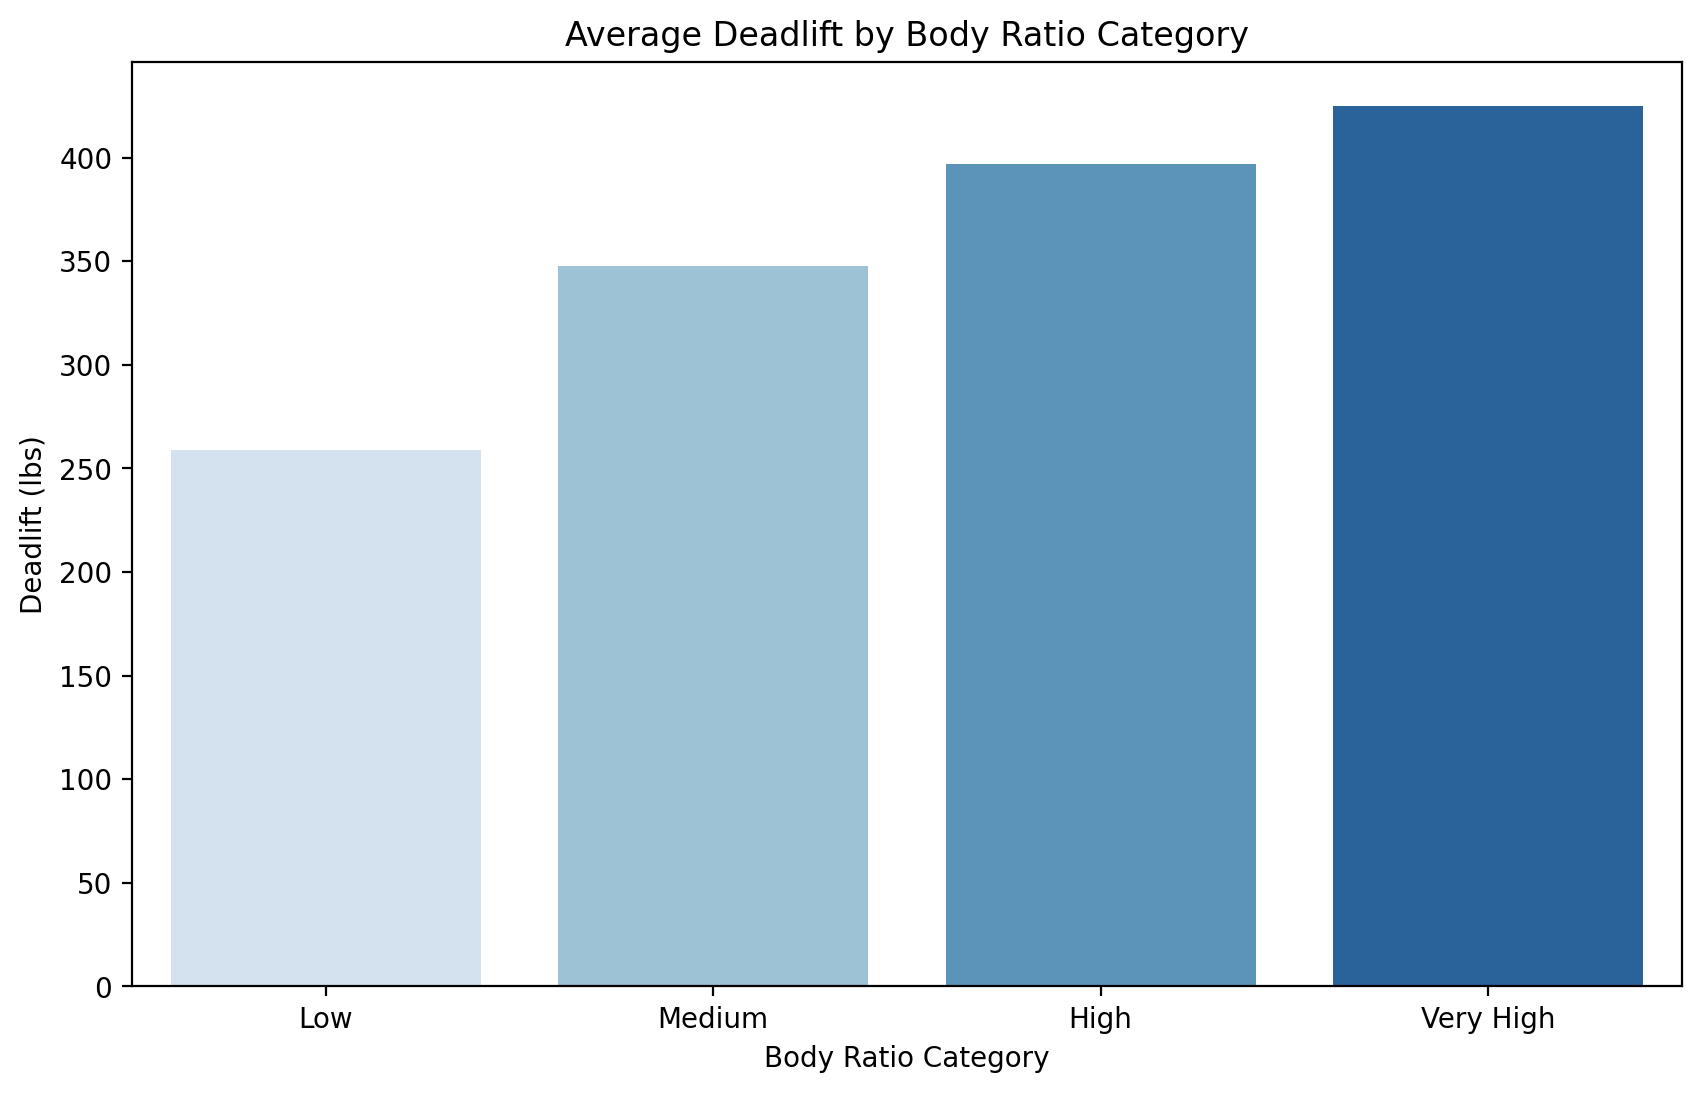

In [48]:
# Q4: Does body ratio (weight/height) relate to deadlift performance?

df_br = df_clean.copy()
df_br["body_ratio"] = df_br["weight"] / df_br["height"]

df_br["ratio_bin"] = pd.qcut(df_br["body_ratio"], 4, labels=["Low","Medium","High","Very High"])

ratio_stats = df_br.groupby("ratio_bin")["deadlift"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=ratio_stats, x="ratio_bin", y="deadlift", palette="Blues")
plt.title("Average Deadlift by Body Ratio Category")
plt.xlabel("Body Ratio Category")
plt.ylabel("Deadlift (lbs)")
plt.show()


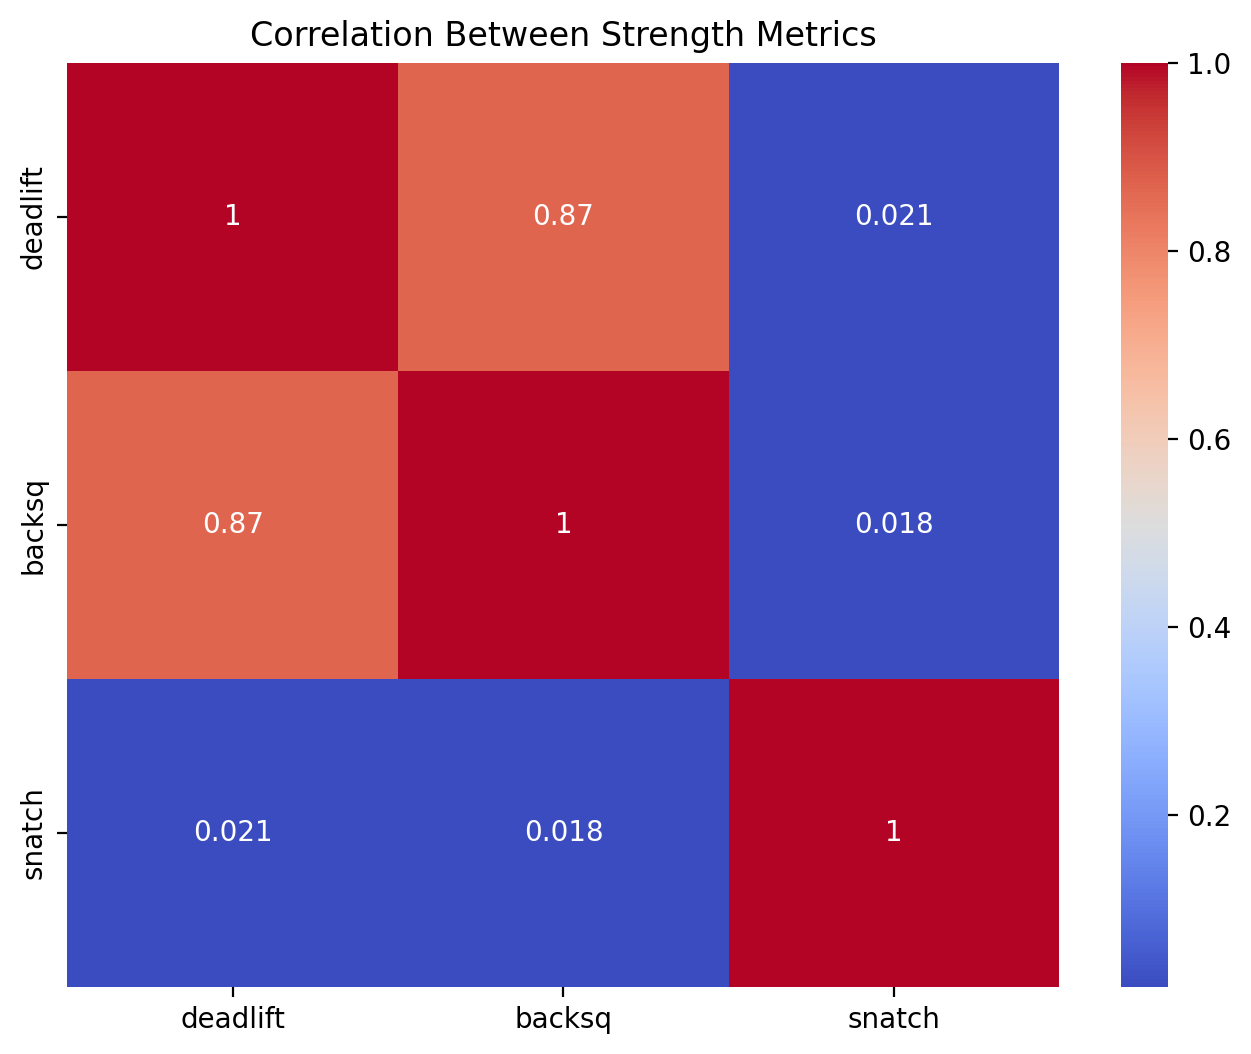

In [49]:
# Q5: Correlation with strength metrics
strength_cols = ['deadlift','backsq','snatch']

plt.figure(figsize=(8,6))
sns.heatmap(df_clean[strength_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Strength Metrics")
plt.show()


<br><br><br>

---

<br><br><br>

# **Part 3: Define and Train a baseline model**

1. **Regression Goal**: Clearly state the problem you’re addressing.

2. **Feature Selection**: Identify the features that seem most relevant. It’s fine to start with all features if you’re unsure.

3. **Train-Test Split**: Partition your data into training, and testing sets. Use simple sampling. Quick reminder - when using ramdom - Use `Seed`!

4. **Model Training**: For simplicity, start with default parameters on a `Linear Regression` model, using scikit-learn. Focus on establishing a baseline.

5. **Model Evaluation**: Present straightforward metrics such as MAE, MSE, RMSE, R2, etc.

6. **Insights**: Summarize the model’s performance with visuals.

7. **Feature Importance:** Explain & Visualize  `feature importance` by looking on the `coefficients` of the Linear Regression model .

<br>

*FYI: Sections 5 and 6 will be repeated throughout your work.*

MAE: 31.50
RMSE: 41.47
R²: 0.814

Coefficients:
  Feature  Coefficient
1  height     3.078053
3  backsq     0.777273
0  weight     0.410920
4  snatch     0.000116
2     age    -0.388256


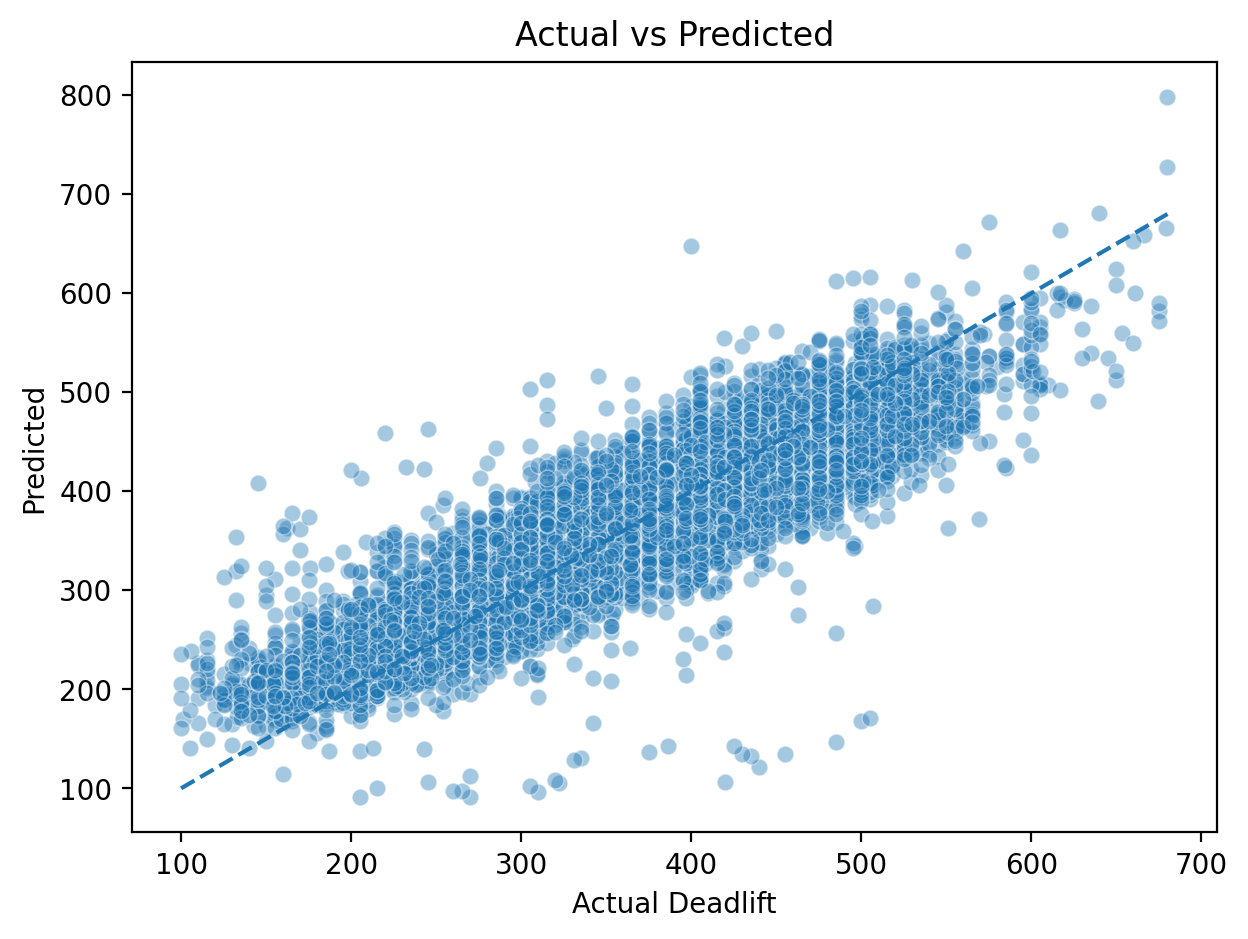

In [86]:
# Linear regression model
target = "deadlift"
features = ["weight", "height", "age", "backsq", "snatch"]

df_model = df_clean.dropna(subset=[target] + features).copy()

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

coeffs = pd.DataFrame({
    "Feature": features,
    "Coefficient": lr.coef_
}).sort_values("Coefficient", ascending=False)

print("\nCoefficients:")
print(coeffs)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Deadlift")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()



<br><br><br>

---

<br><br><br>

# **Part 4: Feature Engineering**

* Create, transform, scale, or extract new features; encoding categoricals, polynomial features, PCA, etc.
*TIP: use sklearn's tools, such as Scalar, One-Hot, etc.*

* To achieve the best possible results on the assignment, make extensive use of feature engineering.

* Use a `Clustring Model` to create a new feature.

### New Features

We recommend reading the resources uploaded to the forum.

In [87]:
df_fe = df_clean.copy()

# BMI (using inches)
df_fe['BMI'] = df_fe['weight'] / (df_fe['height'] ** 2) * 703

# Total strength
df_fe['strength_total'] = df_fe['deadlift'] + df_fe['backsq'] + df_fe['snatch']

# Squat / deadlift ratio
df_fe['sq_dl_ratio'] = df_fe['backsq'] / df_fe['deadlift']

# Weight relative to height
df_fe['body_ratio'] = df_fe['weight'] / df_fe['height']

df_fe = df_fe.replace([np.inf,-np.inf], np.nan).dropna()

df_fe.head()

deadlift  height  weight   age gender  backsq  snatch        BMI  \
0     435.0    73.0   230.0  37.0   Male   414.0   200.0  30.341527   
1     365.0    68.0   177.0  40.0   Male   365.0   185.0  26.909818   
2     465.0    65.0   150.0  31.0   Male   405.0   225.0  24.958580   
3     419.0    72.0   165.0  23.0   Male     0.0   187.0  22.375579   
4     335.0    70.0   155.0  30.0   Male   235.0    95.0  22.237755   

   strength_total  sq_dl_ratio  body_ratio  
0          1049.0     0.951724    3.150685  
1           915.0     1.000000    2.602941  
2          1095.0     0.870968    2.307692  
3           606.0     0.000000    2.291667  
4           665.0     0.701493    2.214286

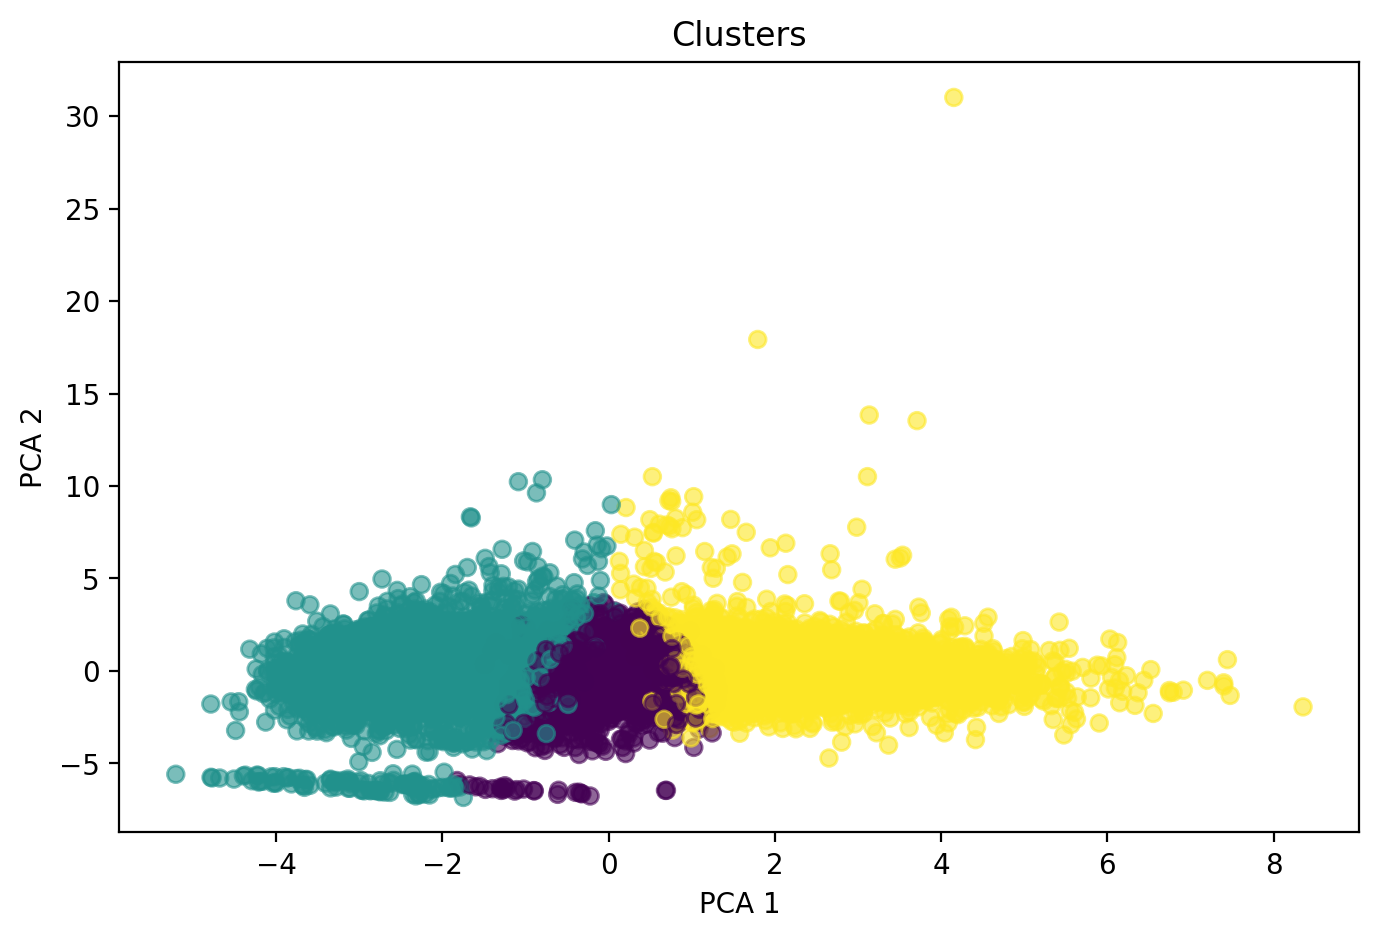

In [88]:
# remove extreme lifts
df_clust = df_fe[
    (df_fe['deadlift'] < 700) &
    (df_fe['backsq'] < 700) &
    (df_fe['snatch'] < 300)
].copy()

features = ['deadlift','backsq','snatch','BMI','strength_total','body_ratio','sq_dl_ratio']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_clust[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df_clust['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)

df_clust['pca1'] = pca_res[:,0]
df_clust['pca2'] = pca_res[:,1]

plt.figure(figsize=(8,5))
plt.scatter(df_clust['pca1'], df_clust['pca2'], c=df_clust['cluster'], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters")
plt.show()



In [55]:
df_clust.groupby('cluster')[features].mean()

deadlift      backsq      snatch         BMI  strength_total  \
cluster                                                                   
0        375.873487  295.463438  158.555191  366.295366      829.892116   
1        246.179088  192.719126  101.296003  331.609208      540.194217   
2        449.102448  381.265792  198.209090  417.846916     1028.577329   

         body_ratio  sq_dl_ratio  
cluster                           
0          2.559926     0.791271  
1          2.178231     0.791376  
2          2.938389     0.855131

### **Applying Clustering (Unsupervised Learning):**

* Run at least one clustering algorithm; K-Means, DBSCAN, etc.
* Visualize the clusters using dimensionality reduction (PCA, t-SNE, UMAP).
* Interpret the clusters: What makes them distinct? Are they useful?
* Use the results to create new features (e.g., cluster ID, distance to centroid, cluster probabilities).


In [56]:
df_fe['cluster'] = df_clust['cluster']

<br><br><br>

---

<br><br><br>

# **Part 5: Train and Evaluate Three Improved Models**

* Retrain your `Linear Regression` model with the engineered features.
* Choose and Train two different types on models from the SKlearn package (DOCS), on the engineered dataset.
* Compare performance with your baseline.
* Visualize feature importance.
* <u>Discuss the improvement and the reasons.</u>
* Declare the winner.

In [89]:
# compare models
features_model = ['height','weight','age','backsq','snatch','body_ratio','BMI']

X = df_fe[features_model]
y = df_fe['deadlift']

X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X),
    y,
    test_size=0.2,
    random_state=42
)

models = {
    "Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, m in models.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    results.append([name, mae, rmse, r2])

results = pd.DataFrame(results, columns=['Model','MAE','RMSE','R²'])
results


Model        MAE       RMSE        R²
0             Linear  31.493616  41.398465  0.815132
1      Random Forest  30.021306  38.988955  0.836025
2  Gradient Boosting  28.617511  37.197118  0.850751

In [90]:
print(results)

best_by_mae = results.loc[results['MAE'].idxmin(), 'Model']
best_by_rmse = results.loc[results['RMSE'].idxmin(), 'Model']
best_by_r2 = results.loc[results['R²'].idxmax(), 'Model']

print("\nBest by MAE:", best_by_mae)
print("Best by RMSE:", best_by_rmse)
print("Best by R²:", best_by_r2)

winner = best_by_r2
print("\nTop model:", winner)



               Model        MAE       RMSE        R²
0             Linear  31.493616  41.398465  0.815132
1      Random Forest  30.021306  38.988955  0.836025
2  Gradient Boosting  28.617511  37.197118  0.850751

Best by MAE: Gradient Boosting
Best by RMSE: Gradient Boosting
Best by R²: Gradient Boosting

Top model: Gradient Boosting


After comparing the three models, Gradient Boosting showed the best performance with the lowest error and highest R².
This means it predicts deadlift performance more accurately than Linear Regression and Random Forest, so it is chosen as the final model.

<br><br><br>

---

<br><br><br>

# Part 6: Winning Model

1. Open a new <u>HuggingFace Model Repository.</u>
2. Export the winning model to a `pickle` file.
3. Upload the pickle file to your new model repository on `HF`.

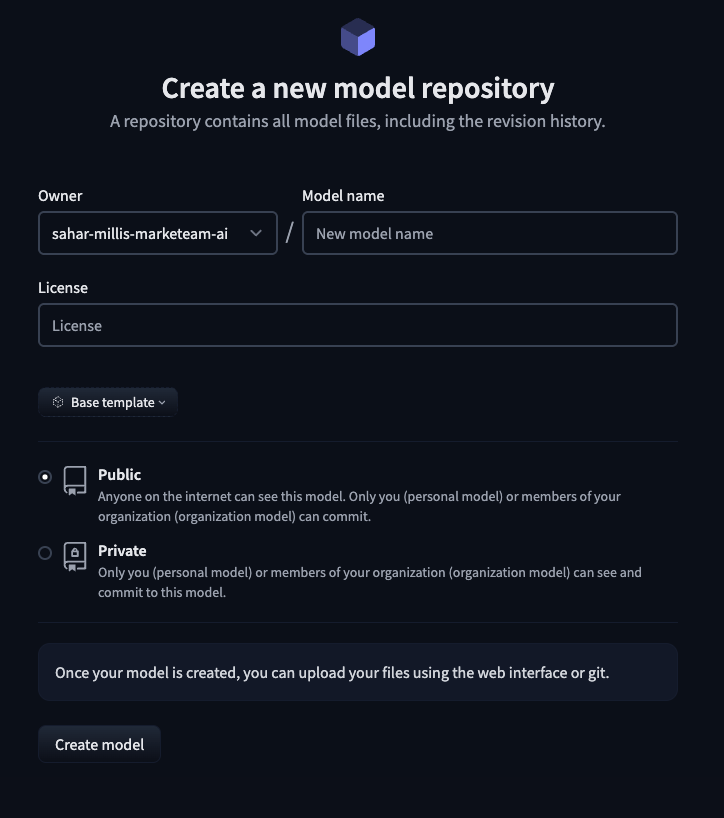

In [92]:
import pickle

# Save winning model (Gradient Boosting)
best_model = gb   # Gradient Boosting was the winner

with open("winning_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as winning_model.pkl")

Model saved as winning_model.pkl


https://huggingface.co/Tomertg/Gradient_Boosting

<br><br><br>

---

<br><br><br>

## Part 7: Regression-to-Classification

In this section, you will **reframe your original regression problem as a classification problem**.
This means transforming your continuous numeric target into **discrete classes**, and then training classification models to predict those classes.








#### **7.1 Create Classes From Your Numeric Target**

Your first task is to convert the continuous target `y` into categories. Choose a strategy to convert your numeric target into classes. For example:


* Median Split (Binary Classification)**
```
Class 0: values **below the median**
Class 1: values **at or above the median**
```

* Quantile Binning (3+ Classes)**
```
>  * Class 0: bottom 33%
>  * Class 1: middle 33%
>  * Class 2: top 33%
```

* Business Rule Threshold** - You define a meaningful cutoff, e.g.:
```
* High-value customer if revenue > X
* “Expensive” product if price > Y
```

**Tasks:**

1. Implement your chosen strategy on the **train** and **test** targets. Using the **same engineered features** as before.

2. Explain the reasoning behind your choice (2–3 sentences).

In [93]:
df_class = df_fe.dropna(subset=['deadlift']).copy()

df_class['deadlift_class'] = pd.qcut(
    df_class['deadlift'],
    3,
    labels=['low','mid','high']
)

print(df_class['deadlift_class'].value_counts())

features = ['weight','height','age','backsq','snatch','BMI','strength_total','body_ratio','sq_dl_ratio']

X = df_class[features]
y = df_class['deadlift_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(y_train.value_counts())


deadlift_class
low     26031
mid     24048
high    23479
Name: count, dtype: int64
deadlift_class
low     20825
mid     19238
high    18783
Name: count, dtype: int64


In [95]:
print("Reason for class creation:")
print("Used quantile binning to split the data into three similar sized groups.")

Reason for class creation:
Used quantile binning to split the data into three similar sized groups.



#### **7.2 Check Class Balance**

Before training your classifier, examine if the classes are balanced.

1. Show the resulting **class distribution** (counts or percentages).
2. Are some classes under-represented?
3. If the data is imbalanced, explain which metric you’ll focus on (e.g., F1 score, recall) and why accuracy alone is misleading.
4. If needed, consider changing your convertion.

In [96]:
print("Class balance (train):")
print((y_train.value_counts(normalize=True) * 100).round(1))

print("\nClass balance (test):")
print((y_test.value_counts(normalize=True) * 100).round(1))

print("\nClasses look fairly even, so no major imbalance issues.")

print("\nUsing accuracy + F1 to check performance, not just accuracy.")


Class balance (train):
deadlift_class
low     35.4
mid     32.7
high    31.9
Name: proportion, dtype: float64

Class balance (test):
deadlift_class
low     35.4
mid     32.7
high    31.9
Name: proportion, dtype: float64

Classes look fairly even, so no major imbalance issues.

Using accuracy + F1 to check performance, not just accuracy.


<br><br><br>

---

<br><br><br>

# Part 8: Train & Eval Classification Models



#### 8.1 Answer the following, and mentioned it in your presentation.



In the context of your dataset/task, explain what would be more importatnt - <u>precision or recall.</u>



In [97]:
print("Recall is more important here because we prefer to correctly identify high performers.")
print("Missing a strong athlete (classifying them too low) is worse than predicting someone as higher.")

Recall is more important here because we prefer to correctly identify high performers.
Missing a strong athlete (classifying them too low) is worse than predicting someone as higher.


In the context of your dataset/task, explain what would be more critical - <u>False Positive or False Negative.</u>


In [98]:
print("False negatives are more important here, since missing a strong athlete hurts more than overestimating one.")

False negatives are more important here, since missing a strong athlete hurts more than overestimating one.


#### 8.2: Train **three** different kinds of classification models.


Go to SKlearn to find different classification models. And use them.

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "RF": RandomForestClassifier(random_state=42),
    "GB": GradientBoostingClassifier(random_state=42)
}

res = []

for name, m in models.items():
    m.fit(X_train, y_train)
    p = m.predict(X_test)

    res.append([
        name,
        accuracy_score(y_test, p),
        precision_score(y_test, p, average='weighted'),
        recall_score(y_test, p, average='weighted'),
        f1_score(y_test, p, average='weighted')
    ])

df_clf = pd.DataFrame(res, columns=["Model","Acc","Prec","Recall","F1"])
print(df_clf)


      Model       Acc      Prec    Recall        F1
0  Logistic  0.989532  0.989564  0.989532  0.989538
1        RF  0.994086  0.994100  0.994086  0.994088
2        GB  0.983687  0.983825  0.983687  0.983706


In [100]:
print(df_results_clf)

print("\nRandom Forest and Gradient Boosting look best so far based on the scores.")
print("Logistic Regression is a bit lower.")


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.989464   0.989497  0.989464  0.989470
1        Random Forest  0.994426   0.994439  0.994426  0.994427
2    Gradient Boosting  0.983687   0.983825  0.983687  0.983706

Random Forest and Gradient Boosting look best so far based on the scores.
Logistic Regression is a bit lower.


#### 8.3: Evaluation

- Evaluate the Classification Models.

- For each print the `classification report` (precision, recall, F1-score, support), and show a `confusion matrix`. (use SKlean built tools) Comment on what types of mistakes the model makes (based on the confusion matrix).

- Identify which model performs best and **why**.




 Classification Evaluation:


🔹 Model: Logistic
              precision    recall  f1-score   support

        high       0.99      0.98      0.99      4696
         low       1.00      1.00      1.00      5206
         mid       0.98      0.99      0.98      4810

    accuracy                           0.99     14712
   macro avg       0.99      0.99      0.99     14712
weighted avg       0.99      0.99      0.99     14712



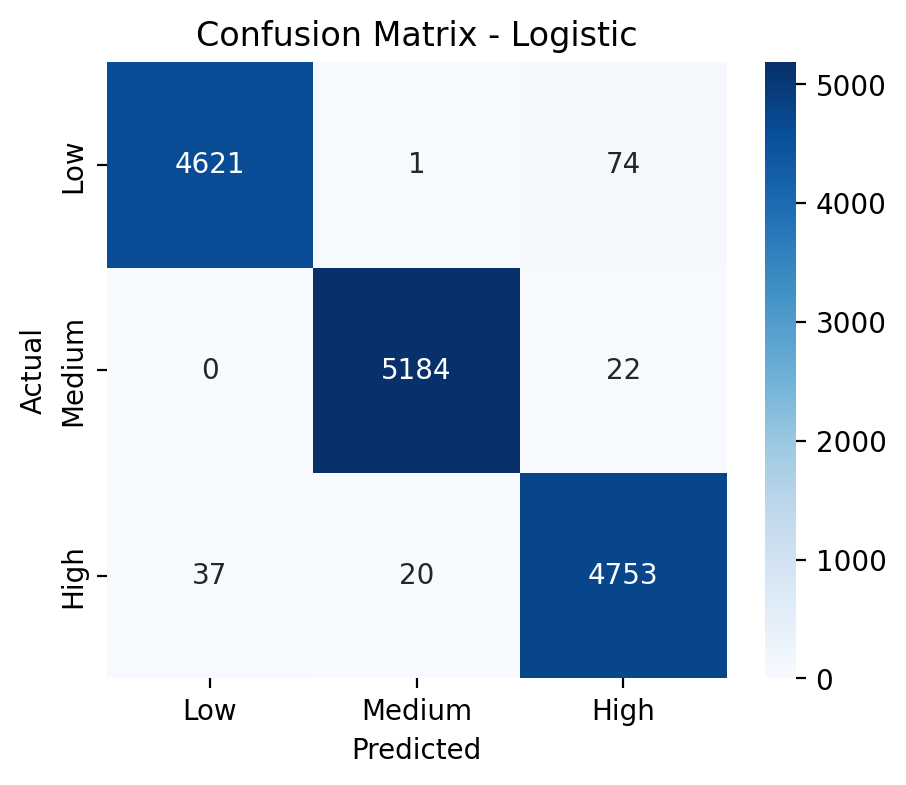


🔹 Model: RF
              precision    recall  f1-score   support

        high       1.00      0.99      1.00      4696
         low       0.99      1.00      1.00      5206
         mid       0.99      0.99      0.99      4810

    accuracy                           0.99     14712
   macro avg       0.99      0.99      0.99     14712
weighted avg       0.99      0.99      0.99     14712



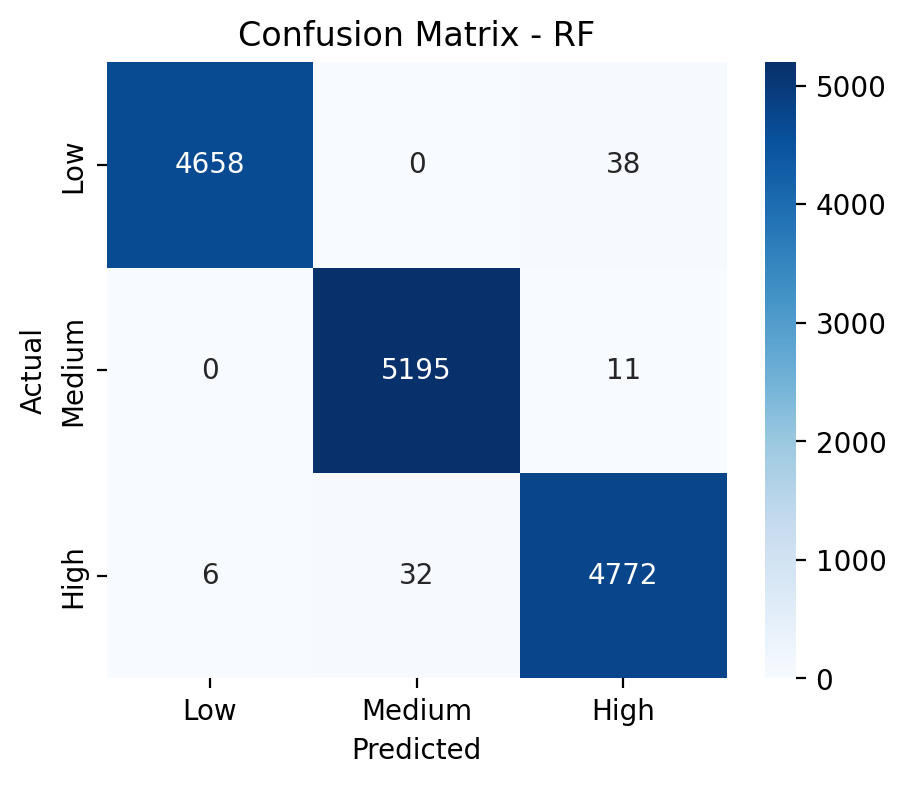


🔹 Model: GB
              precision    recall  f1-score   support

        high       1.00      0.98      0.99      4696
         low       0.99      0.99      0.99      5206
         mid       0.97      0.98      0.98      4810

    accuracy                           0.98     14712
   macro avg       0.98      0.98      0.98     14712
weighted avg       0.98      0.98      0.98     14712



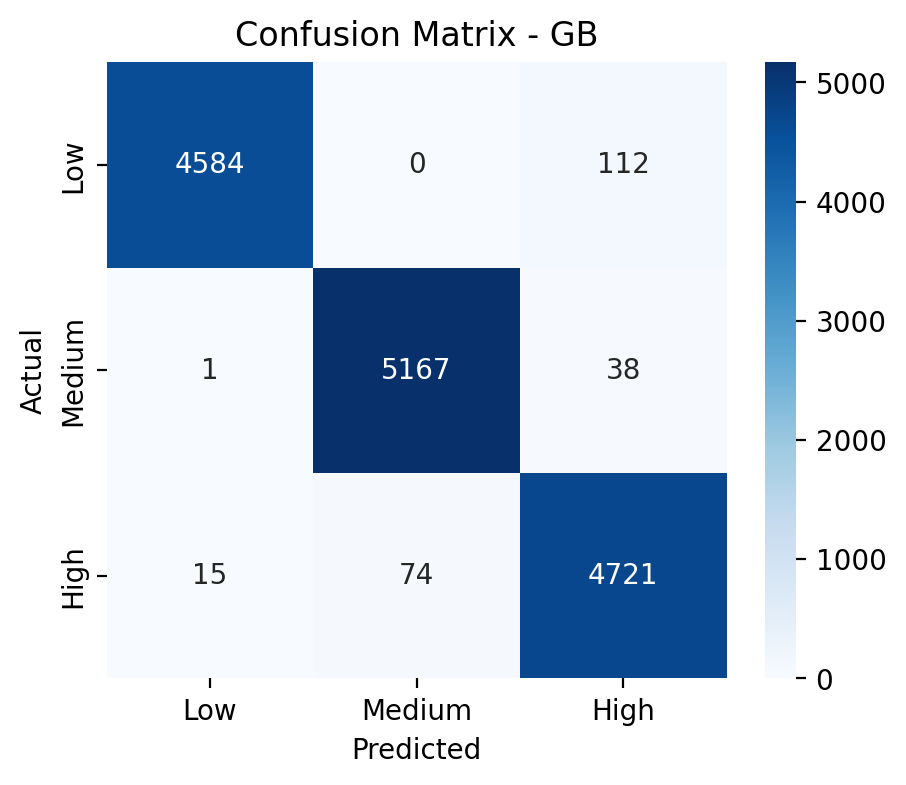

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n Classification Evaluation:\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔹 Model: {name}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=['Low','Medium','High'],
                yticklabels=['Low','Medium','High'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [104]:
print("RF and GB performed best, with most predictions correct.")
print("RF shows fewer mistakes between the extremes (low/high), so it looks like the strongest model.")

RF and GB performed best, with most predictions correct.
RF shows fewer mistakes between the extremes (low/high), so it looks like the strongest model.


#### 8.4: Winner

- Choose the best one out of the three models.

- Export the model to a `pickle` file.

- Upload the pickle file to the same(!) model repository.


In [112]:
# select best model based on F1
best_model_name = df_results_clf.loc[df_results_clf['F1'].idxmax(), 'Model']
print("Best model:", best_model_name)

# match names to actual models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

final_model = models[best_model_name]
final_model.fit(X_train, y_train)

# save model
import pickle
with open("best_classifier.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Model saved.")


Best model: Random Forest
Model saved.


<br><br><br>

---

<br><br><br>

# **Part 9: Presentation Video**

- Record a brief video (4–6 minutes) with screen sharing of you walk through the HF's model repository, README, and sharing your process & results. Include a screen share while also recording yourself talking during the walk through.

- The recording will include sharing the screen, and you talking to the camera (show yourself in a circle on the bottom).

- Videos without your face talking while going ower your work wont be acceptable.











> For help:
> - Youtube [Watch this video](https://www.youtube.com/watch?v=DK7Z_nYhjjg)
> - Loom [Watch this video](https://www.youtube.com/watch?v=eSCHNXTsJK8)
> - Zoom [Watch this video](https://www.youtube.com/watch?v=njwbjFYCbGU)


- Include:
  - A quick dataset overview and your main goal.
  - Key EDA steps and highlights of visual insights.
  - How you engineered features. About your clustering.
  - The models you trained, your iterative process, and what you learned.
  - Key visualizations and takeaways.
  - Reflections on any challenges and lessons learned.
  - Extra work.

- Finally, attach the video to the beginning of the `README` file, and make sure everything works. *The video should be placed at the beginning of the notebook and must be playable within it. It can be hosted on `Vimeo`, `YouTube`, or `Loom`.*

<br><br><br>

---

<br><br><br>

# Part 10: Moodle

**Submit to Moodle only one link - the link to your HF's Model Repository.**  

The Repo should Include:
- README
- Python Notebook
- 1 pickle model for regression
- 1 pickle model for classification


---

<br>
<br>
<br>
<br>

Good luck and have fun creating AI model!